In [1]:
import csv
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import string
from collections import Counter


# Discovering Most Popular Interests

Top topics: sports, health, entertainment, food, politics, education, history, environment, science, climate, inequality, technology


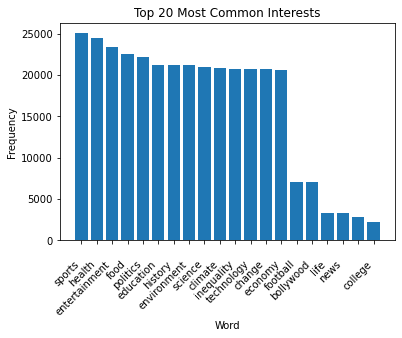

In [18]:
df = pd.read_csv("../Datasets/Master_Pixstory_Dataset_EXTRACT_ANALYSIS.csv")

text = df['Interest'].str.cat(sep=' ')


# Convert the text to lowercase and split it into words
words = text.lower().split()

# Define the set of punctuation marks to exclude from the words
exclude = set(string.punctuation)

# Define the stop words to exclude from the frequency counter
stop_words = ['the', 'is', 'not', 'so', 'after', 'all']

# Remove the stop words from the list of words
words = [word for word in words if word not in stop_words]

# Remove the punctuation marks from each word
words = [''.join(ch for ch in word if ch not in exclude) for word in words]

# Calculate the frequencies of each word and keep the top 10
top_words = Counter(words).most_common(20)

# Extract the word and frequency values into separate lists
word_values = [pair[0] for pair in top_words]
frequency_values = [pair[1] for pair in top_words]

# Create a histogram of the word frequencies
fig, ax = plt.subplots()
ax.bar(word_values, frequency_values, align='center')
ax.set_xticks(word_values)
ax.set_xticklabels(word_values, rotation=45, ha='right')
ax.tick_params(axis='x', which='major', pad=15)
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
ax.set_title('Top 20 Most Common Interests')
plt.show()

# Cleaning and Prepping the Data

In [2]:
df1 = pd.read_csv("../Datasets/Master_Pixstory_Dataset_EXTRACT_ANALYSIS.csv")

df1 = df1.drop(columns=[col for col in df1.columns if col not in ['Interest', 'Date (No Timestamp)']])
df1 = df1.dropna(subset=['Interest'])

# Convert the 'date' column to a string
df1['Date (No Timestamp)'] = df1['Date (No Timestamp)'].apply(lambda x: str(x))

# Rename the 'date' column to 'Date'
df1 = df1.rename(columns={'Date (No Timestamp)': 'Date'})

# Convert all words in the "Interest" column to lowercase
df1['Interest'] = df1['Interest'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
df1['Interest'] = df1['Interest'].apply(lambda x: [word.lower() for word in x])

df1


,Date,Interest
0,2020-01-12,"[trends, fashion, barbie]"
1,2020-01-12,"[food, momos, weird menus]"
2,2020-01-12,"[misogyny, st xaviers]"
3,2020-01-12,"[technology, history, food, entertainment, spo..."
4,2020-02-12,[us government]
...,...,...
95003,2022-12-08,"[college life, college life umang]"
95004,2022-12-08,[college life]
95005,2022-12-08,[friends]
95006,2022-12-08,"[college life, college life umang]"


# Counting frequency of Interests on Daily Basis

In [3]:
# Create a function to tally the counts of each interest
def tally_interests(interests, interest_type):
    counts = []
    for interest in interests:
        count = 0
        for word in interest:
            if word == interest_type:
                count += 1
        counts.append(count)
    return counts

# Group by date and tally interests
df2 = df1.groupby('Date').agg(
    sports_count=('Interest', lambda x: sum(tally_interests(x, 'sports'))),
    health_count=('Interest', lambda x: sum(tally_interests(x, 'health'))),
    entertainment_count=('Interest', lambda x: sum(tally_interests(x, 'entertainment'))),
    food_count=('Interest', lambda x: sum(tally_interests(x, 'food'))),
    politics_count=('Interest', lambda x: sum(tally_interests(x, 'politics'))),
    education_count=('Interest', lambda x: sum(tally_interests(x, 'education')))
).reset_index()

# Convert the "Date" column to datetime objects, dropping rows with invalid values
df2 = df2[pd.to_datetime(df2['Date'], format='%Y-%m-%d', errors='coerce').notnull()]

# Sort df2 by increasing date
df2 = df2.sort_values('Date', ascending=True)

# Calculate the cumulative count for each interest type
df2['sports_count_cumulative'] = df2['sports_count'].cumsum()
df2['health_count_cumulative'] = df2['health_count'].cumsum()
df2['entertainment_count_cumulative'] = df2['entertainment_count'].cumsum()
df2['food_count_cumulative'] = df2['food_count'].cumsum()
df2['politics_count_cumulative'] = df2['politics_count'].cumsum()
df2['education_count_cumulative'] = df2['education_count'].cumsum()


df2

,Date,sports_count,health_count,entertainment_count,food_count,politics_count,education_count,sports_count_cumulative,health_count_cumulative,entertainment_count_cumulative,food_count_cumulative,politics_count_cumulative,education_count_cumulative
0,2020-01-12,1,1,1,2,1,1,1,1,1,2,1,1
1,2020-02-12,0,0,0,0,0,0,1,1,1,2,1,1
2,2020-11-17,345,489,315,263,403,279,346,490,316,265,404,280
3,2020-11-18,25,28,17,17,14,14,371,518,333,282,418,294
4,2020-11-19,44,30,30,36,32,28,415,548,363,318,450,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2022-11-08,0,0,0,1,0,0,24498,21758,22928,21467,21863,20936
507,2022-12-01,4,4,4,4,4,4,24502,21762,22932,21471,21867,20940
508,2022-12-05,0,0,0,0,0,0,24502,21762,22932,21471,21867,20940
509,2022-12-07,0,0,2,0,0,0,24502,21762,22934,21471,21867,20940


# Reformatting Data for Observable

In [4]:
# Create a new dataframe for Observable
df_observable = pd.DataFrame(columns=['date', 'name', 'category', 'value'])

# Loop over the interest type columns and populate the new dataframe
for col in ['sports_count_cumulative', 'health_count_cumulative', 'entertainment_count_cumulative', 'food_count_cumulative', 'politics_count_cumulative', 'education_count_cumulative']:
    df_observable = df_observable.append(pd.DataFrame({
        'date': df2['Date'],
        'name': col.split('_')[0].capitalize(),
        'category': 'Interest',
        'value': df2[col]
    }))

# Reset the index of the new dataframe
df_observable = df_observable.reset_index(drop=True)

# Sort df2 by increasing date
df_observable = df_observable.sort_values('date', ascending=True)

df_observable



/var/folders/pj/c3bwxcz17fx4v5_bp1h430h00000gn/T/ipykernel_20142/3761071893.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_observable = df_observable.append(pd.DataFrame({
/var/folders/pj/c3bwxcz17fx4v5_bp1h430h00000gn/T/ipykernel_20142/3761071893.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_observable = df_observable.append(pd.DataFrame({
/var/folders/pj/c3bwxcz17fx4v5_bp1h430h00000gn/T/ipykernel_20142/3761071893.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_observable = df_observable.append(pd.DataFrame({
/var/folders/pj/c3bwxcz17fx4v5_bp1h430h00000gn/T/ipykernel_20142/3761071893.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

,date,name,category,value
0,2020-01-12,Sports,Interest,1
1022,2020-01-12,Entertainment,Interest,1
2044,2020-01-12,Politics,Interest,1
511,2020-01-12,Health,Interest,1
2555,2020-01-12,Education,Interest,1
...,...,...,...,...
2043,2022-12-08,Food,Interest,21474
1021,2022-12-08,Health,Interest,21762
510,2022-12-08,Sports,Interest,24502
2554,2022-12-08,Politics,Interest,21867


In [6]:
# Save the Data as a CSV file
df_observable.to_csv('interest_engagement.csv', index=False)

In [5]:
#save Data as a JSON file
df_observable.to_json('interest_engagement.json', orient='records')